In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("E:\Data Science\Assignment-6\loan.xlsx")
print(df)

    Sex        Age  Time_at_address Res_status  Telephone Occupation  \
0     M  50.750000            0.585      owner      given  unemploye   
1     M  19.670000           10.000       rent  not_given   labourer   
2     F  52.830002           15.000      owner      given  creative_   
3     M  22.670000            2.540       rent  not_given  creative_   
4     M  29.250000           13.000      owner      given     driver   
..   ..        ...              ...        ...        ...        ...   
424   M  34.169998            2.750      owner      given  guard_etc   
425   F  22.250000            1.250       rent  not_given  unemploye   
426   M  23.330000            1.500      owner      given  creative_   
427   M  21.000000            4.790       rent  not_given  productio   
428   M  27.750000            1.290      owner      given   labourer   

    Job_status  Time_employed  Time_bank Liab_ref    Acc_ref  Home_Expn  \
0    unemploye              0          0        f      given

In [3]:
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [4]:
#check the type of  data
df.dtypes

Sex                 object
Age                float64
Time_at_address    float64
Res_status          object
Telephone           object
Occupation          object
Job_status          object
Time_employed        int64
Time_bank            int64
Liab_ref            object
Acc_ref             object
Home_Expn            int64
Balance              int64
Decision            object
dtype: object

In [5]:
# assign dependent and independent variables
data = df.drop('Decision',axis=1).copy()
x = pd.get_dummies(data)
x.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [6]:
from sklearn.preprocessing import LabelEncoder
#perform label encoding of y
le_Decision = LabelEncoder()
df['Decision_n'] = le_Decision.fit_transform(df['Decision'])
y = df['Decision_n']
print(y)

0      1
1      1
2      0
3      0
4      1
      ..
424    1
425    1
426    0
427    0
428    1
Name: Decision_n, Length: 429, dtype: int32


In [7]:
#performing train test spliiting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [8]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


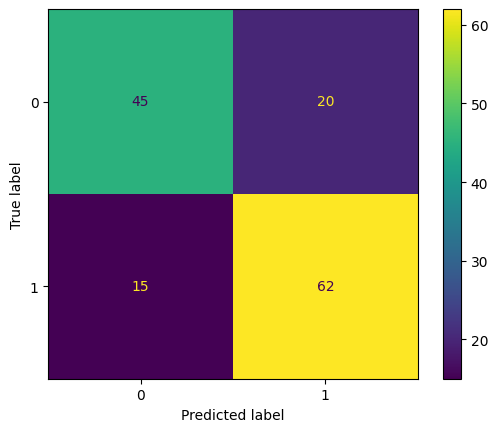

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [10]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.7535211267605634

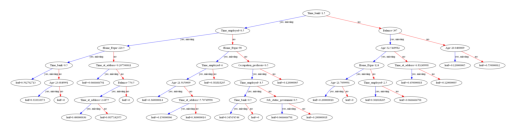

In [11]:
from xgboost import plot_tree
plot_tree(model)
plt.show()

In [12]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
svc = svm.SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7535211267605634


C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


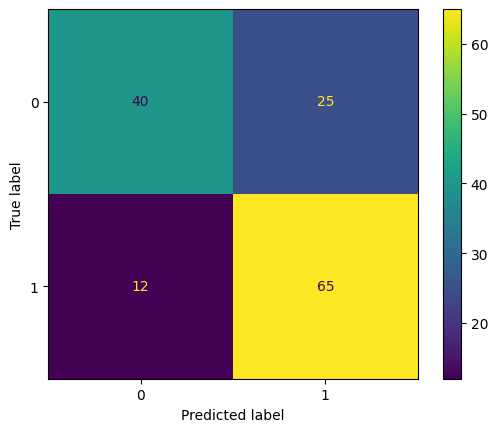

In [13]:
plot_confusion_matrix(svc,X_test,y_test)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
LR_model.score(X_train, y_train)

0.7979094076655052

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


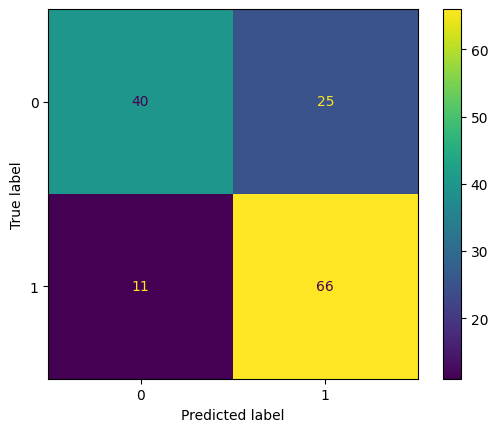

In [16]:
plot_confusion_matrix(LR_model,X_test,y_test)
plt.show()